In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Importing the dataset

dataset = pd.read_csv('HealthData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 13].values


In [3]:
#handling missing data

from sklearn.preprocessing import Imputer
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer=imputer.fit(X[:,11:13])
X[:,11:13]=imputer.transform(X[:,11:13])

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
#splitting dataset into training set and test set

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25)

In [5]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

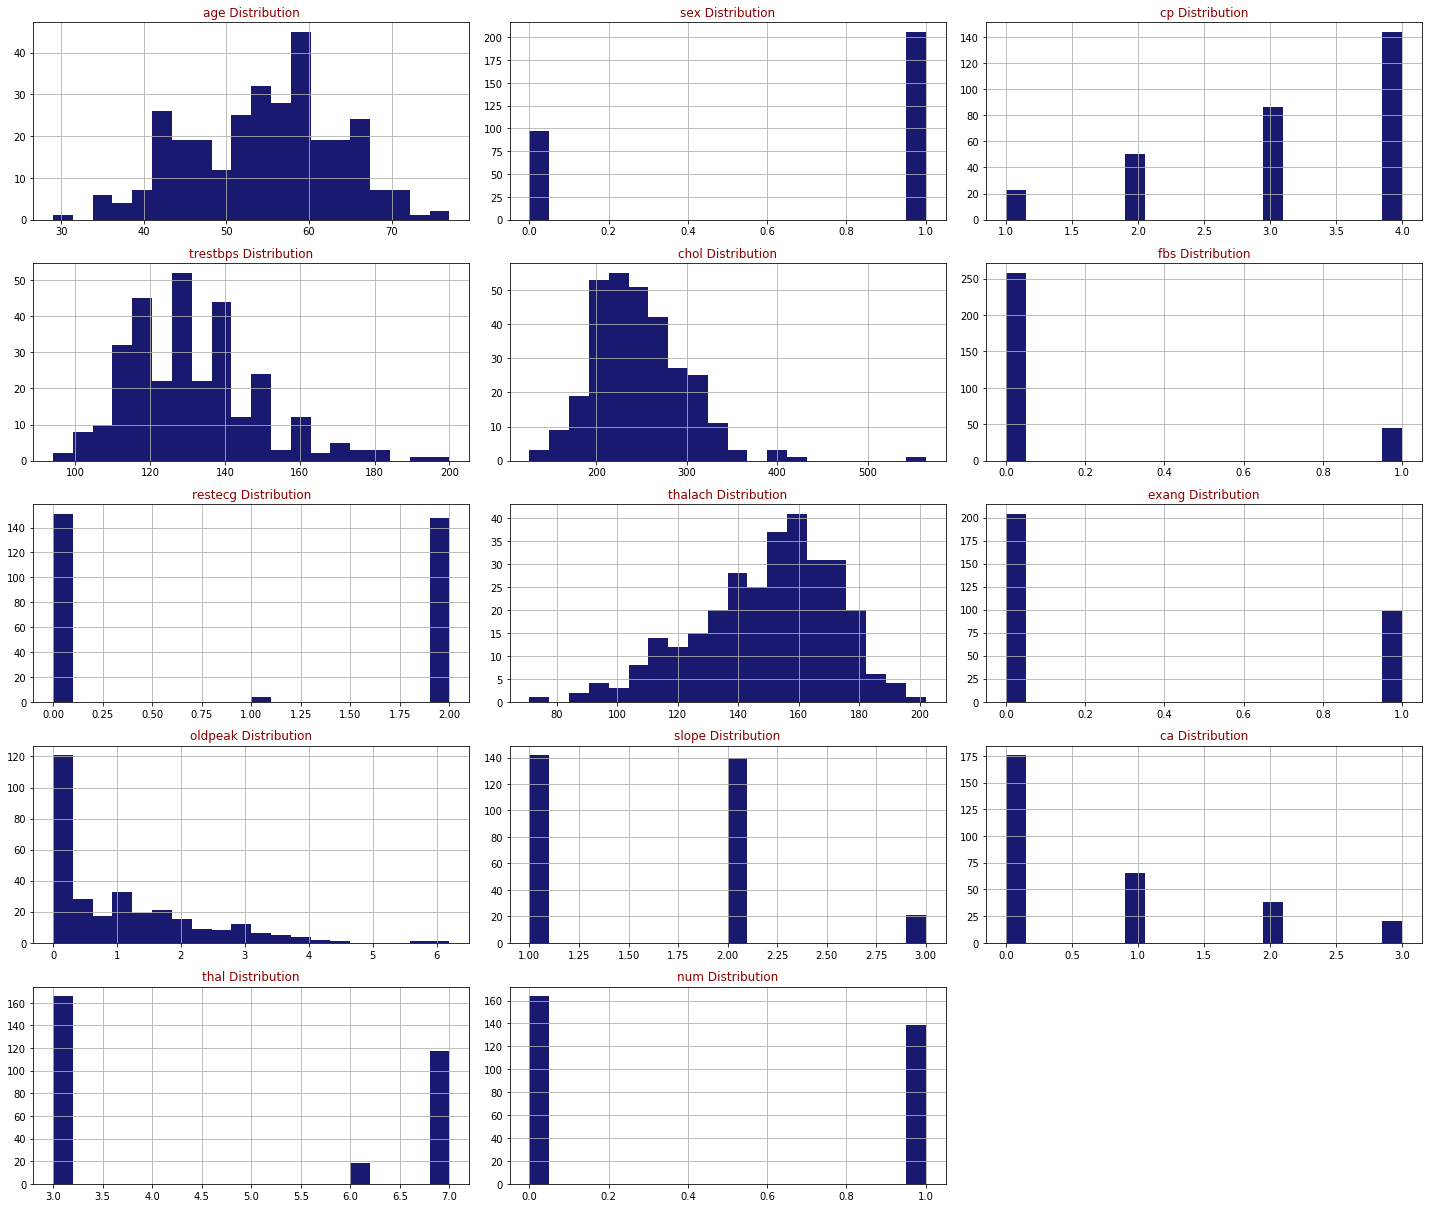

In [6]:
#exploring the dataset

import matplotlib.pyplot as plt
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')

    fig.tight_layout()
    plt.show()
draw_histograms(dataset,dataset.columns,6,3)

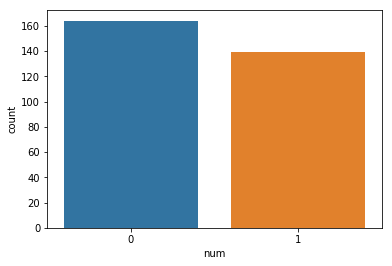

In [7]:
dataset.num.value_counts()
import seaborn as sn
sn.countplot(x='num',data=dataset)

Text(0, 0.5, 'num')

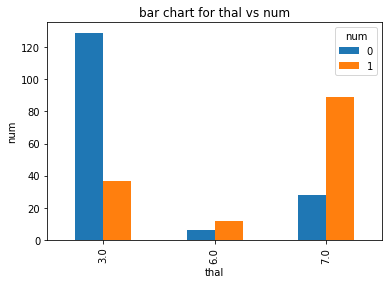

In [8]:
#VISULAIZATIONS----relationship between attributes

pd.crosstab(dataset.thal,dataset.num).plot(kind='bar')
plt.title('bar chart for thal vs num')
plt.xlabel('thal')
plt.ylabel('num')

Text(0, 0.5, 'num')

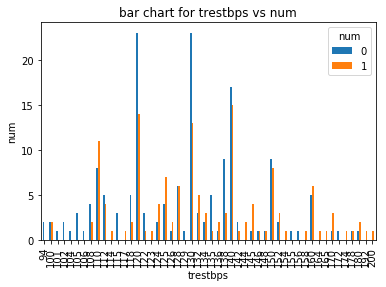

In [9]:

pd.crosstab(dataset.trestbps,dataset.num).plot(kind='bar')
plt.title('bar chart for trestbps vs num')
plt.xlabel('trestbps')
plt.ylabel('num')


Text(0, 0.5, 'num')

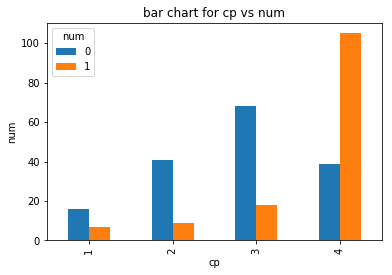

In [10]:
pd.crosstab(dataset.cp,dataset.num).plot(kind='bar')
plt.title('bar chart for cp vs num')
plt.xlabel('cp')
plt.ylabel('num')


Text(0, 0.5, 'num')

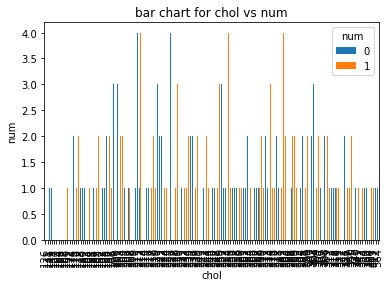

In [11]:
pd.crosstab(dataset.chol,dataset.num).plot(kind='bar')
plt.title('bar chart for chol vs num')
plt.xlabel('chol')
plt.ylabel('num')

Text(0, 0.5, 'num')

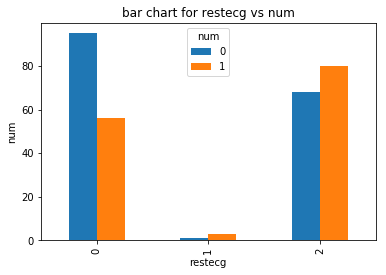

In [12]:
pd.crosstab(dataset.restecg,dataset.num).plot(kind='bar')
plt.title('bar chart for restecg vs num')
plt.xlabel('restecg')
plt.ylabel('num')

In [13]:
####------------similarly can be seen for all the attributes------------------

#### logistic regression

#fitting LR to training set

from sklearn.linear_model import LogisticRegression
classifier =LogisticRegression()
classifier.fit(X_train,Y_train)


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
#Saving the model to disk
#from sklearn.externals import joblib

#filename = 'Logistic_regression_model.pkl'
#joblib.dump(classifier,filename)


In [15]:
#Predict the test set results

y_Class_pred=classifier.predict(X_test)

#checking the accuracy for predicted results

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_Class_pred)

0.7763157894736842

In [16]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_Class_pred)

In [17]:
#Interpretation:

from sklearn.metrics import classification_report
print(classification_report(Y_test, y_Class_pred))


              precision    recall  f1-score   support

           0       0.76      0.89      0.82        44
           1       0.80      0.62      0.70        32

   micro avg       0.78      0.78      0.78        76
   macro avg       0.78      0.76      0.76        76
weighted avg       0.78      0.78      0.77        76



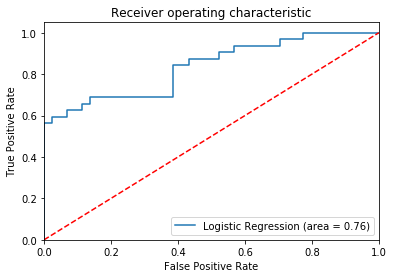

In [18]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [19]:
##PREDICTION FOR NEW DATASET

Newdataset = pd.read_csv('newdata.csv')
ynew=classifier.predict(Newdataset)

In [20]:
print(ynew)

[1]
